## Pankaj Kumar

1. Importing Essential Libraries
2. Importing Data
3. EDA and Feature Engineering
   1. Check for Null values
   2. Plots
   3. Moving Averages
4. Splitting the Time-series Data
5. Scaling Data using Min-Max scaler
6. Model Building
7. Prediction

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     -------- ---------------------------- 30.7/126.5 kB 660.6 kB/s eta 0:00:01
     -------------------------- ---------- 92.2/126.5 kB 871.5 kB/s eta 0:00:01
     ------------------------------------ 126.5/126.5 kB 824.9 kB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ----------

In [3]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [4]:
#Loading the required data
df=pd.read_csv("C:/Users/pankaj kumar/Downloads/tesla/Tesla Stock Price (2010 to 2023).csv")
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
print('Number of days present in the dataset: ',df.shape[0])
print('Number of fields present in the dataset: ',df.shape[1])

Number of days present in the dataset:  3162
Number of fields present in the dataset:  6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 29/06/2010 to 19/01/2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3162 non-null   float64
 1   High       3162 non-null   float64
 2   Low        3162 non-null   float64
 3   Close      3162 non-null   float64
 4   Adj Close  3162 non-null   float64
 5   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [8]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<font color="blue" size=+2.5><b> Check for Null values </b></font>

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<font color="blue" size=+2.5><b> Plots </b></font>

The stock prices are almost constant until 2019 and thus I'll take the split of the data to only work on the data that shows methodical/abrupt changes.

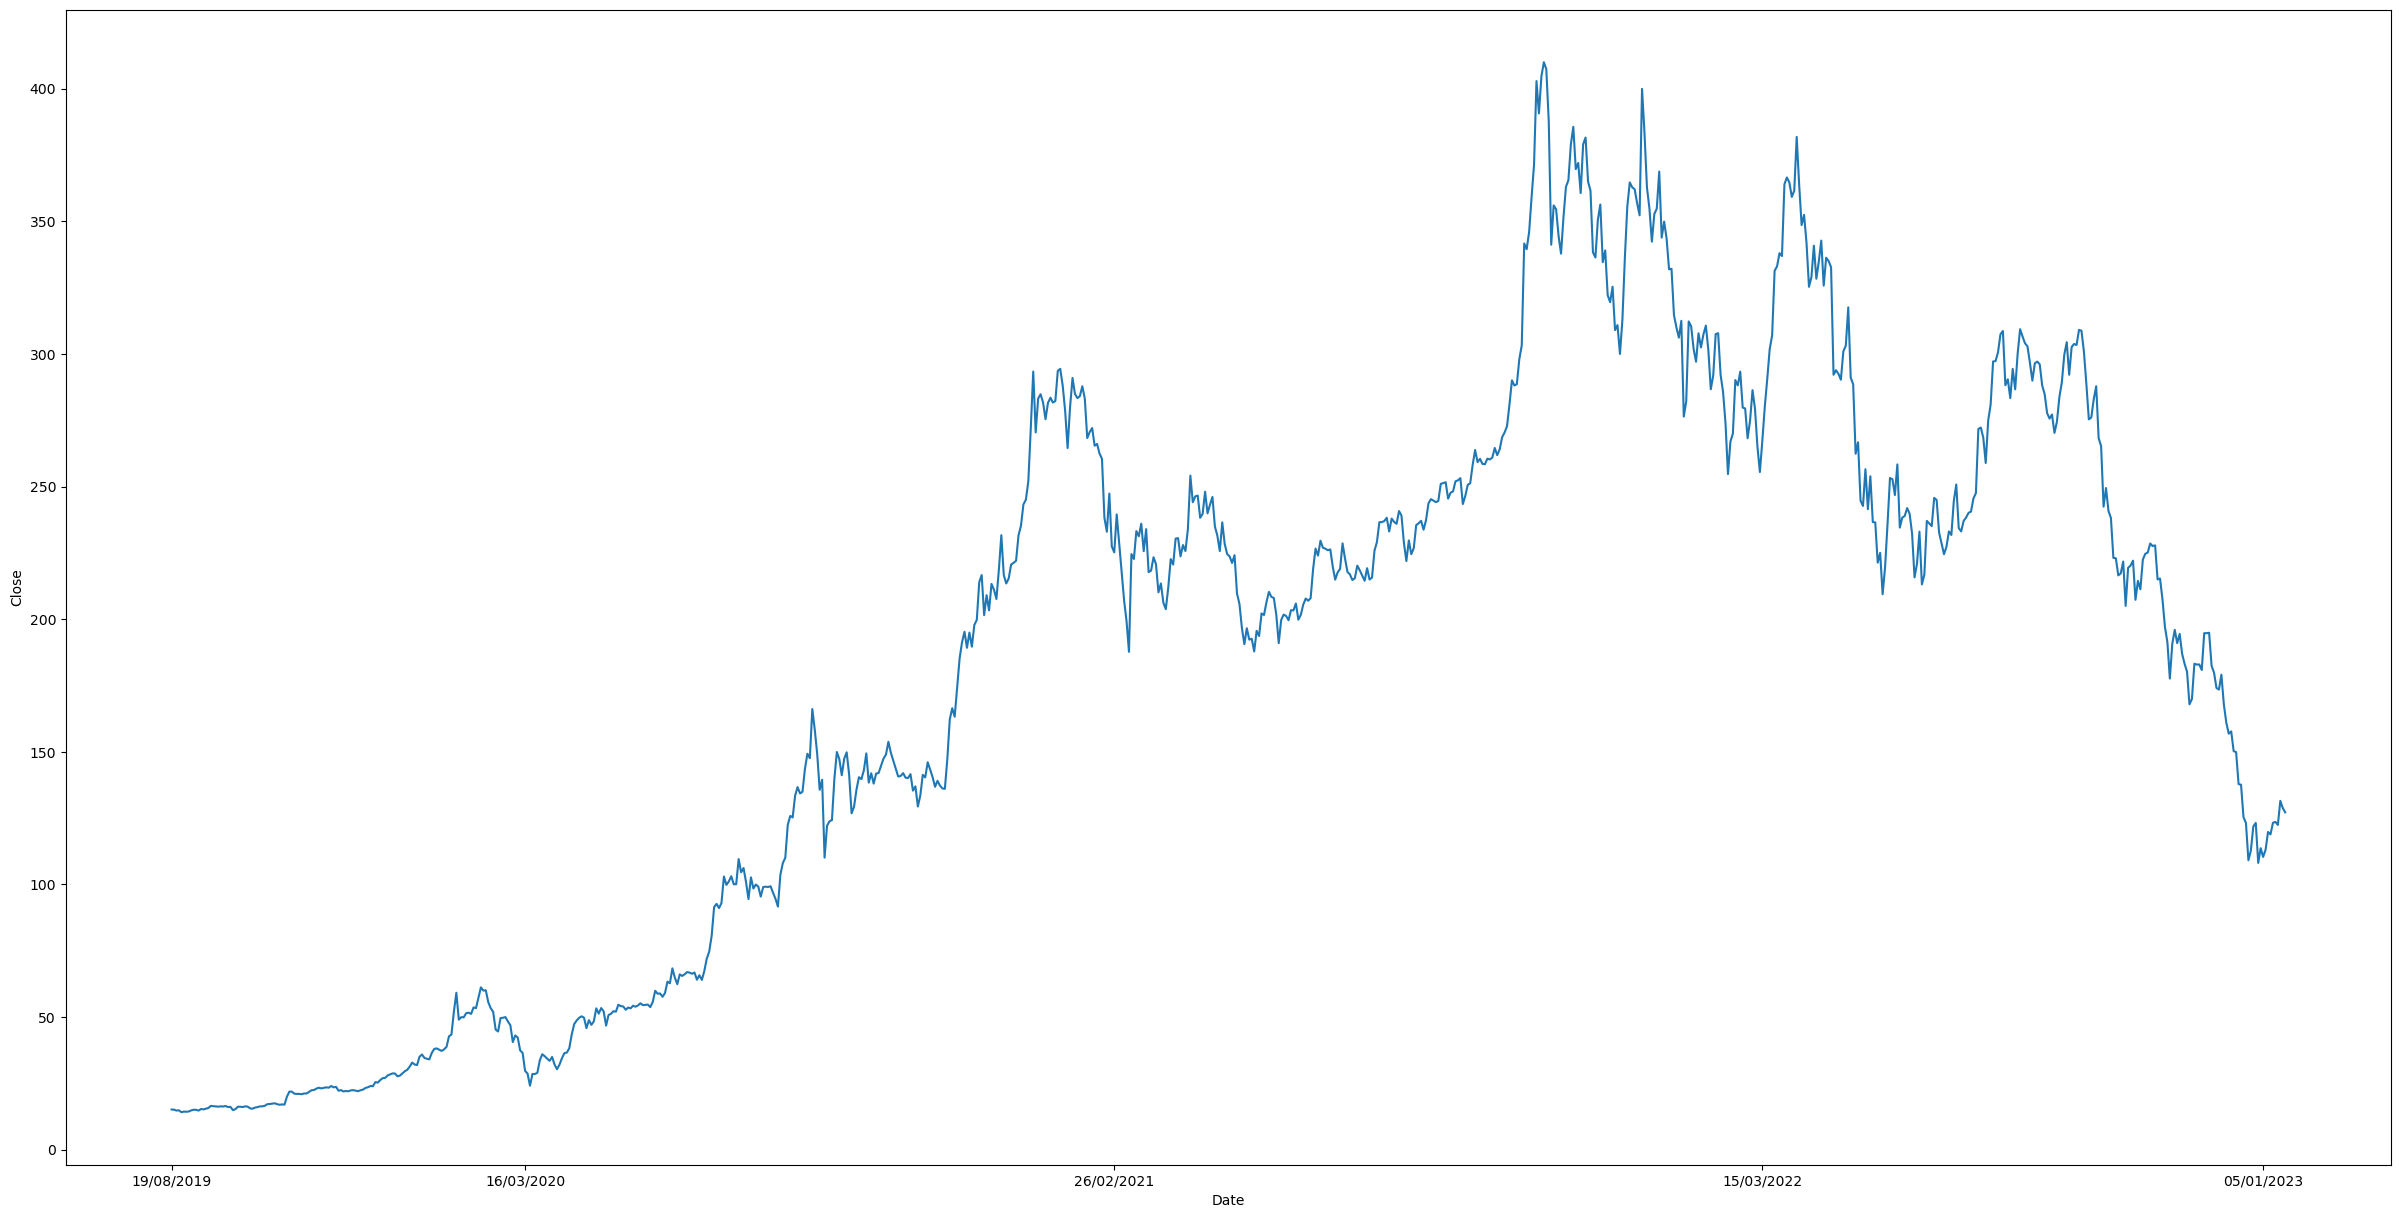

In [10]:
data=df.iloc[2300:].copy()

plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [11]:
data=df.iloc[2300:].copy()

names = cycle(['Stock Open Price','Stock High Price','Stock Low Price','Stock Close Price'])

fig = px.line(data, x=data.index, y=[data['Open'],data['High'], data['Low'],data['Close']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

In [12]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

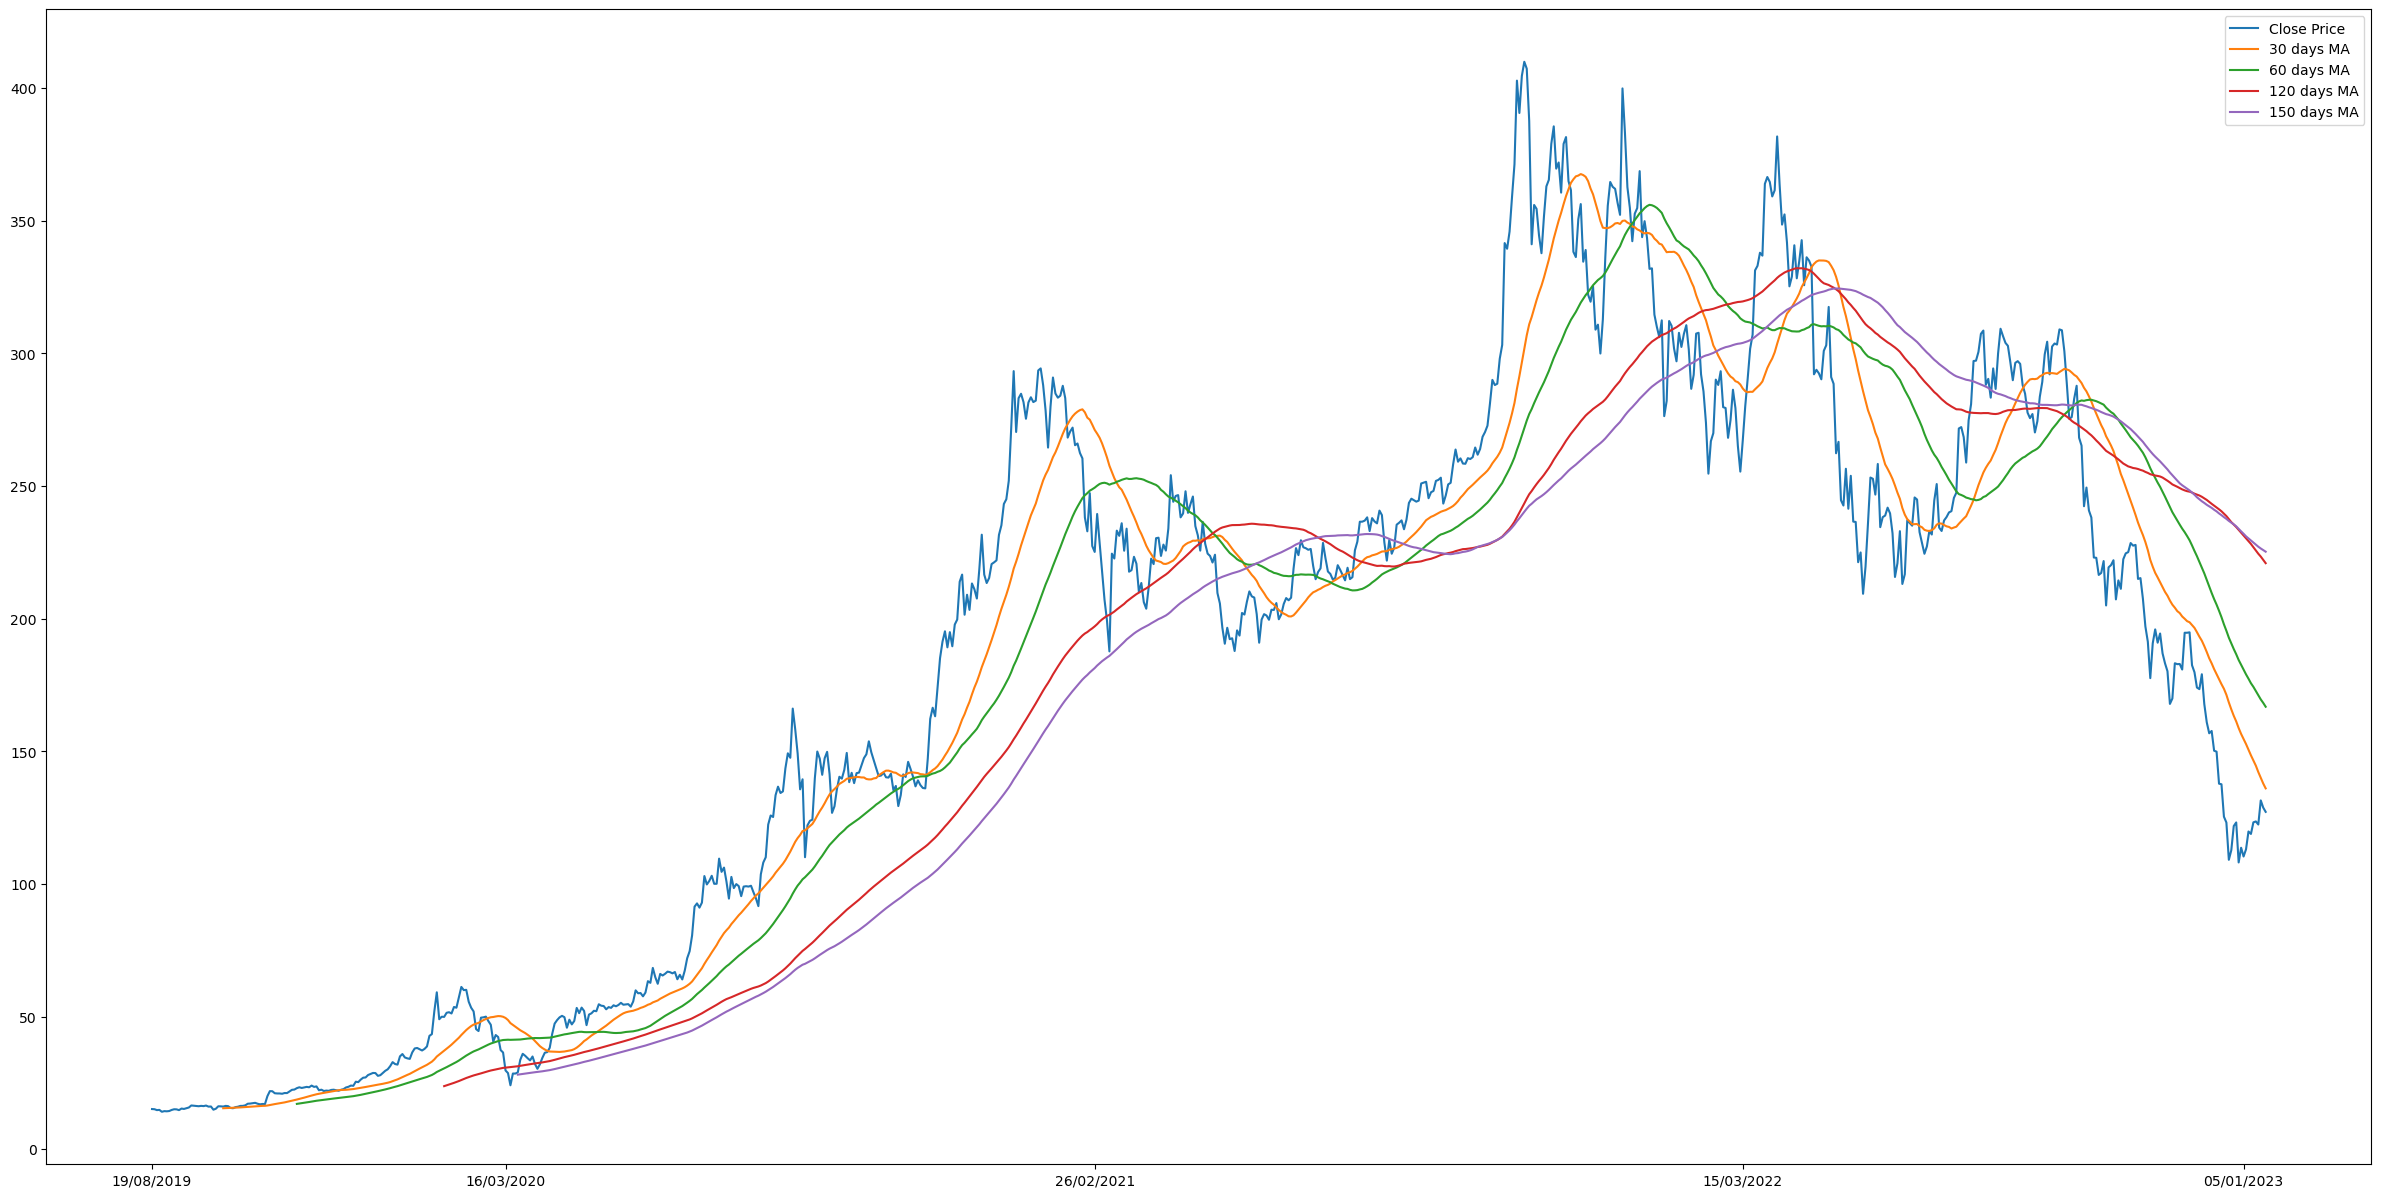

In [13]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [14]:
names = cycle(['Close Price','MA 30 days','MA 60 days','MA 120 days','MA 150 days'])

fig = px.line(data, x=data.index ,y=[data['Close'],data['MA for 30 days'],data['MA for 60 days'],data['MA for 120 days'], data['MA for 150 days']],labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Moving Average Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

In [15]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [16]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (646, 1)
test_data:  (216, 1)


In [17]:
# Using Min-Max scaler to scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

LSTMs are commonly used for modeling time series data as they are able to capture the long-term dependencies between inputs, while also being able to handle the noise and volatility that is often present in time series data. This makes LSTMs suitable for prediction tasks such as stock prices, weather forecasts, and energy demand. In a time series context, LSTMs take in previous time steps as inputs, and use their memory cells, gates, and state updates to process and make predictions on future time steps.

In [18]:
# Initializing the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
19/19 [==============================] - 8s 92ms/step - loss: 0.0597
Epoch 2/150
19/19 [==============================] - 2s 92ms/step - loss: 0.0101
Epoch 3/150
19/19 [==============================] - 2s 92ms/step - loss: 0.0071
Epoch 4/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0074
Epoch 5/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0071
Epoch 6/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0065
Epoch 7/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0063
Epoch 8/150
19/19 [==============================] - 2s 92ms/step - loss: 0.0060
Epoch 9/150
19/19 [==============================] - 2s 95ms/step - loss: 0.0063
Epoch 10/150
19/19 [==============================] - 2s 110ms/step - loss: 0.0055
Epoch 11/150
19/19 [==============================] - 2s 94ms/step - loss: 0.0050
Epoch 12/150
19/19 [==============================] - 2s 92ms/step - loss: 0.0053
Epoch 13/150
19/19 [====

Epoch 101/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0021
Epoch 102/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0019
Epoch 103/150
19/19 [==============================] - 2s 90ms/step - loss: 0.0020
Epoch 104/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0026
Epoch 105/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0019
Epoch 106/150
19/19 [==============================] - 2s 90ms/step - loss: 0.0020
Epoch 107/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0022
Epoch 108/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0021
Epoch 109/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0020
Epoch 110/150
19/19 [==============================] - 2s 91ms/step - loss: 0.0018
Epoch 111/150
19/19 [==============================] - 2s 92ms/step - loss: 0.0018
Epoch 112/150
19/19 [==============================] - 2s 94ms/step - loss: 0.0021
Epoc

In [21]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [22]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [23]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

7/7 [==============================] - 2s 33ms/step


In [24]:
test_df['Predictions']=predicted

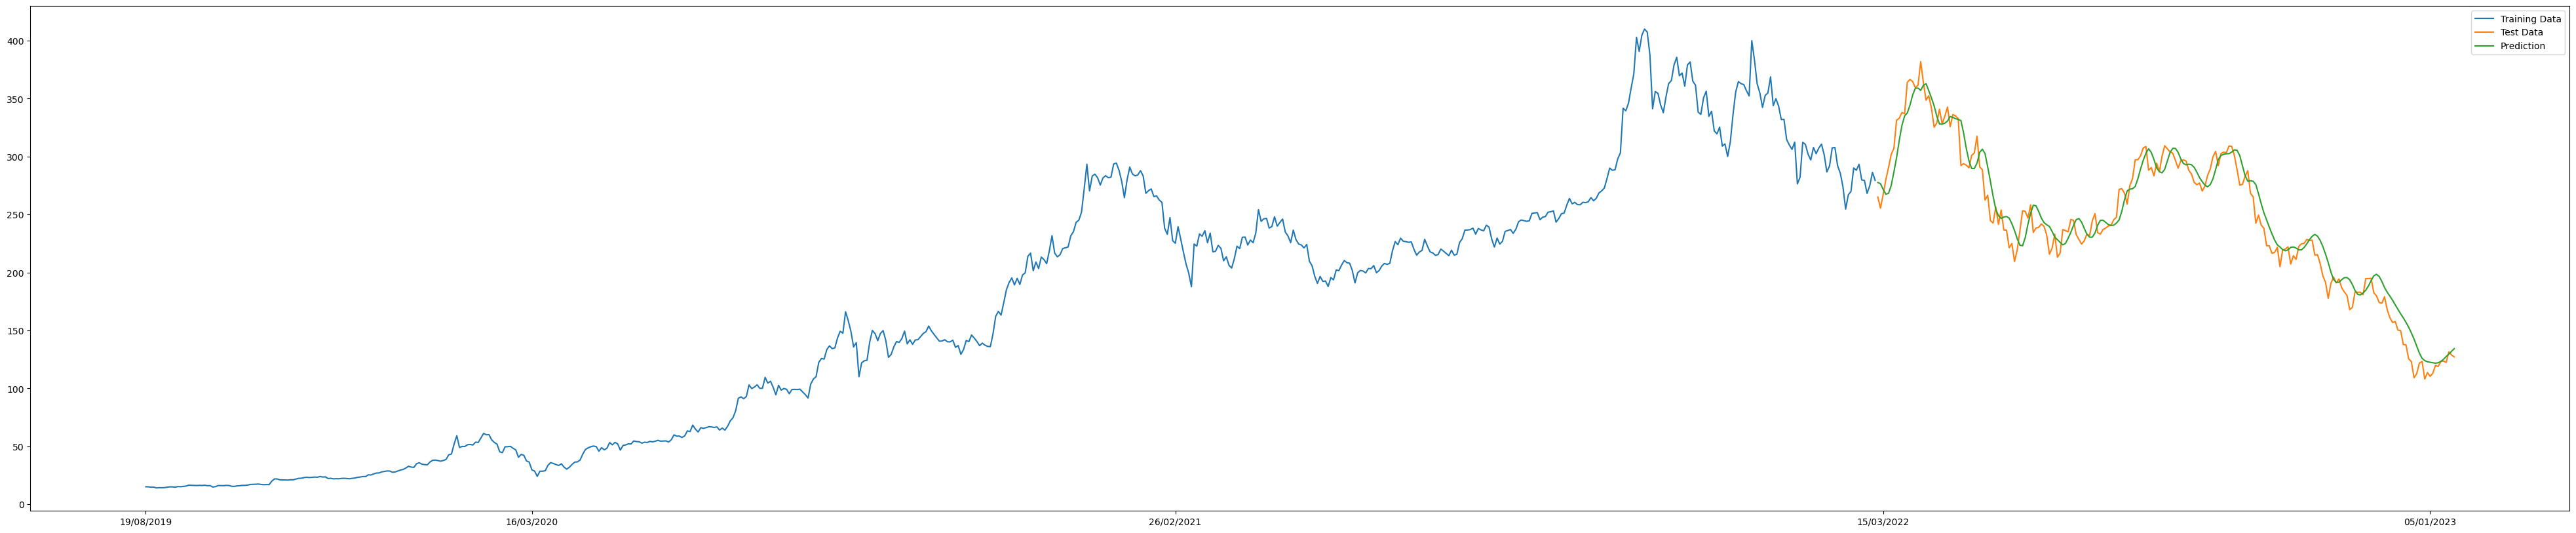

In [25]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                    mode='lines',
                    name='Training Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Close'],
                    mode='lines',
                    name='Test Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Predictions'],
                    mode='lines',
                    name='Prediction'))

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [27]:
print('The Mean Squared Error is',mean_squared_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Mean Absolute Error is',mean_absolute_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Root Mean Squared Error is',np.sqrt(mean_squared_error(test_df['Close'].values,test_df['Predictions'].values)))

The Mean Squared Error is 216.99627844070469
The Mean Absolute Error is 11.886156165464048
The Root Mean Squared Error is 14.730793544161315
